# **Malaria Image Clasification**

In [ ]:
## Importing Libraries

In [ ]:
## Scientific library to work with images
import numpy as np 

## To perform task related to Operating System
import os

## Computer Visulization library to deal with images
import cv2

from PIL import Image

import matplotlib.pyplot as plt



#tensorflow modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **Data acquisition** 

In [ ]:
classes = os.listdir('/content/drive/MyDrive/Colab_Notebooks/Malaria Cell Detection/Cell_images/')
data = '/content/drive/MyDrive/Colab_Notebooks/Malaria Cell Detection/Cell_images/'

In [ ]:
classes

['Parasitized', 'Uninfected']

In [ ]:
parasitized = os.listdir("/content/drive/MyDrive/Colab_Notebooks/Malaria Cell Detection/Cell_images/Parasitized/")
uninfected = os.listdir("/content/drive/MyDrive/Colab_Notebooks/Malaria Cell Detection/Cell_images/Uninfected/")

In [ ]:
print('Length of Uninfected' , len(parasitized))
print('Length of Infected' , len(uninfected))

Length of Uninfected 13780
Length of Infected 13780


In [ ]:
train_path = '/content/drive/MyDrive/Colab_Notebooks/Malaria Cell Detection/Cell_images/Training_images'
valid_path = '/content/drive/MyDrive/Colab_Notebooks/Malaria Cell Detection/Cell_images/Test_images'

### Shape of Images

In [ ]:
parasitized_data = os.listdir("/content/drive/MyDrive/Colab_Notebooks/Malaria Cell Detection/Cell_images/Parasitized")

In [ ]:
sh= data +"/Parasitized"+"/C99P60ThinF_IMG_20150918_141001_cell_133.png"
print("Shape of image: ",cv2.imread(sh).shape)

Shape of image:  (145, 142, 3)


### Uninfected Images

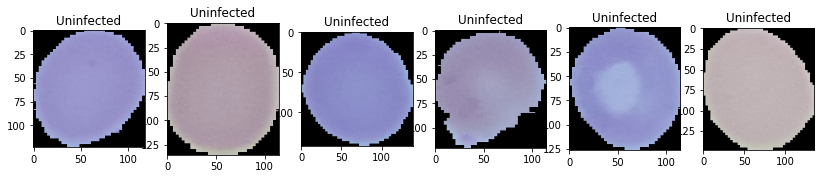

In [ ]:
plt.figure(figsize=(14,14))

for i in range(6):
    plt.subplot(2,6,i+1)
    type1 = "Uninfected"
    imgdir = data + type1
    imgfile = np.random.choice(os.listdir(imgdir))
    img = cv2.imread(imgdir+"/"+imgfile)
    plt.imshow(img)
    plt.title(type1)
plt.show()

### Parasitized Images

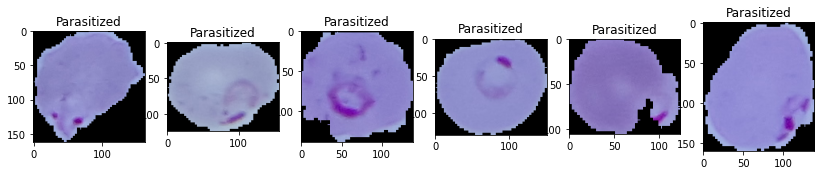

In [ ]:
plt.figure(figsize=(14,14))
for i in range(6):
    plt.subplot(2,6,i+1)
    type2="Parasitized"
    imgdir = data + type2
    imgfile = np.random.choice(os.listdir(imgdir))
    img = cv2.imread(imgdir+"/"+imgfile)
    plt.imshow(img)
    plt.title(type2)
plt.show()

we can clearly see differences in parasitized and uninfected images. Hopefully our convolutional neural network will be able to learn these patterns.

### Data Augumentation

Let's automatically generate a flow of batches from a directory (and also do some data augmentation in images) with the help of Keras _flow_fromdirectory and ImageDataGenerator.

As manipulation, we are going to rotate, resize and scale the images, so the model becomes more robust to different image settings.

Also, let's split our data in train and validation data.

p.s. to use Keras _.flow_fromdirectory and generate manipulated images from a directory, it is mandatory to organize images in sub-directories, and the directories should contain only images of one class.



In [ ]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='constant')  #Try other fill modes, e.g. nearest, reflect, wrap

In [ ]:
batch_size = 16
#Let's prepare our data. We will use .flow_from_directory() 
#to generate batches of image data (and their labels) 
#directly from our png in their respective folders.
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=45,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for validation:
# only rescaling. But you can try other operations
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab_Notebooks/Malaria Cell Detection/Training_images',  # this is the input directory
        target_size=(150, 150),  # all images will be resized to 64x64
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 24940 images belonging to 2 classes.


In [ ]:
# this is a similar generator, for validation data
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab_Notebooks/Malaria Cell Detection/Validation_images',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 2618 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'Parasitized': 0, 'Uninfected': 1}
{'Parasitized': 0, 'Uninfected': 1}


## **CNN Model (Convolutional Neural Network):**

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

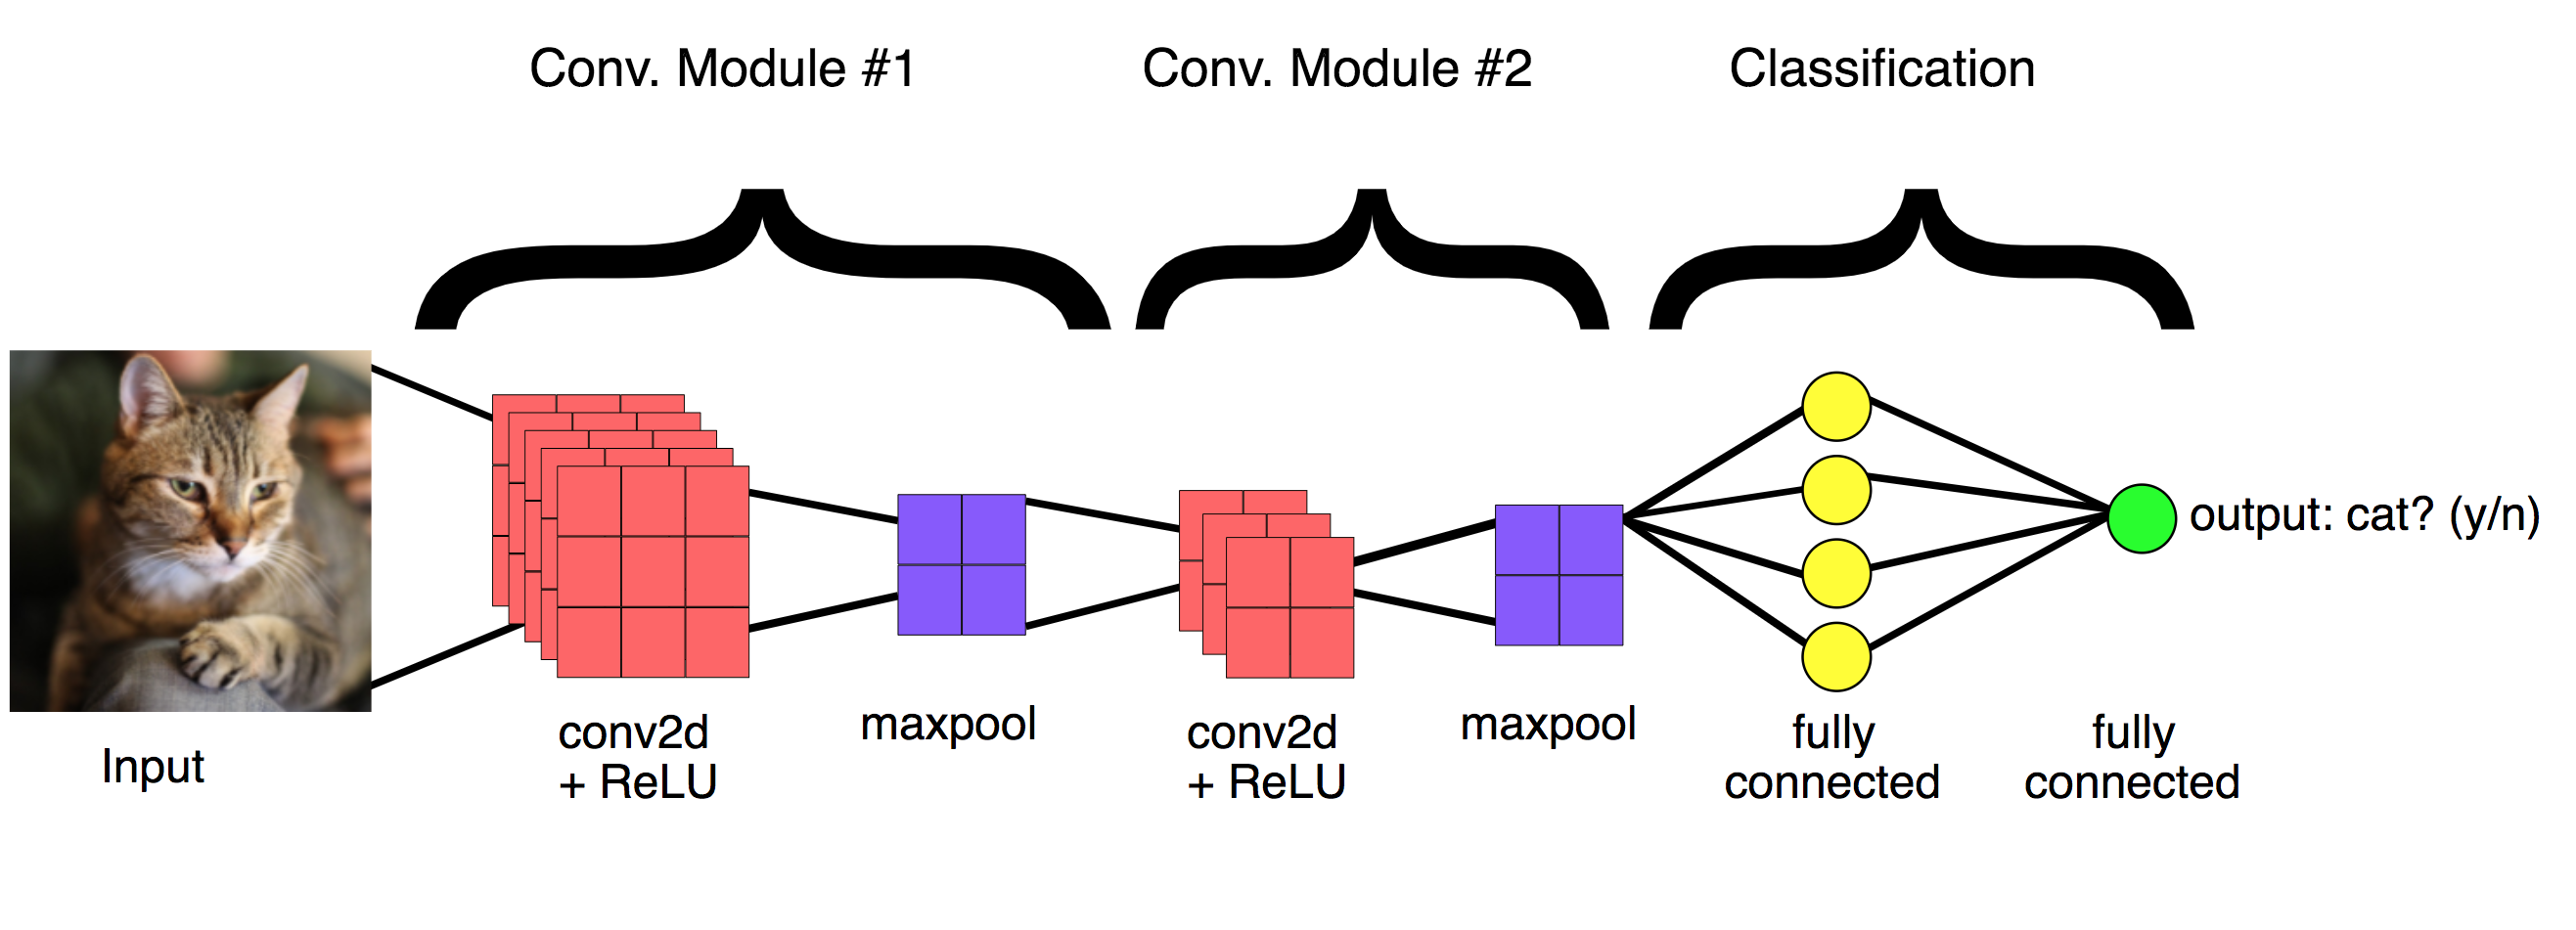

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K
### Create Model from scratch using CNN

# defining sequential model
size = 150
INPUT_SHAPE = (size,size,3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())    
##############################


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

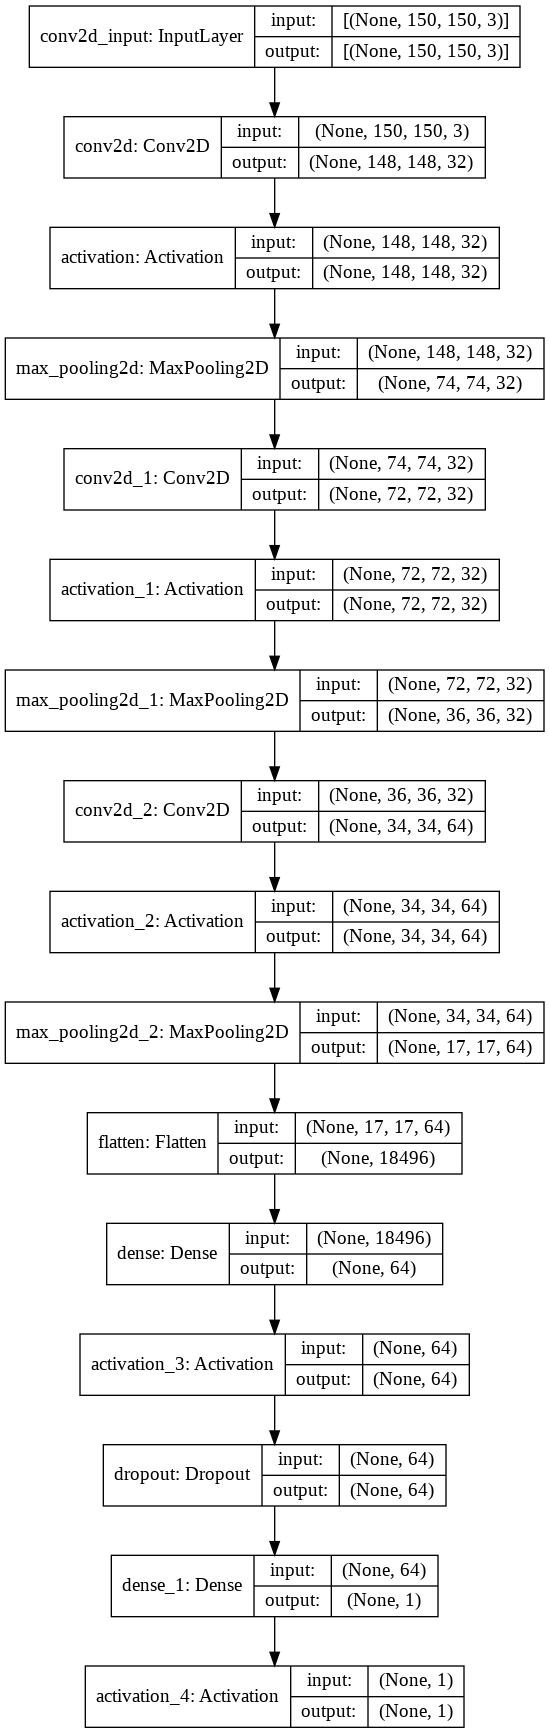

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


### Implementing Early stop method

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",patience=5, verbose=True)

In [ ]:
#We can now use these generators to train our model. 
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,    #The 2 slashes division return rounded integer
        epochs=20,
        validation_data=validation_generator,
        validation_steps=800 // batch_size,
        callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
125/125 [==============================] - 810s 6s/step - loss: 0.7109 - accuracy: 0.5465 - val_loss: 0.7011 - val_accuracy: 0.4487
Epoch 2/20
125/125 [==============================] - 680s 5s/step - loss: 0.6185 - accuracy: 0.7219 - val_loss: 0.5411 - val_accuracy: 0.7975
Epoch 3/20
125/125 [==============================] - 604s 5s/step - loss: 0.4467 - accuracy: 0.8577 - val_loss: 0.4062 - val_accuracy: 0.8238
Epoch 4/20
125/125 [==============================] - 527s 4s/step - loss: 0.3897 - accuracy: 0.8888 - val_loss: 0.7784 - val_accuracy: 0.8462
Epoch 5/20
125/125 [==============================] - 472s 4s/step - loss: 0.4056 - accuracy: 0.8855 - val_loss: 0.4188 - val_accuracy: 0.8550
Epoch 6/20
125/125 [==============================] - 408s 3s/step - loss: 0.3514 - accuracy: 0.9060 - val_loss: 0.4300 - val_accuracy: 0.8600
Epoch 7/20
125/125 [==============================] - 361s 3s/step - loss: 0.3417 - accuracy: 0.9050 - val_loss: 0.4661 - val_accuracy: 0.8425

In [ ]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/Colab_Notebooks/Malaria Cell Detection/model_1.hdf5')

NameError: ignored

### Visualizing Performance

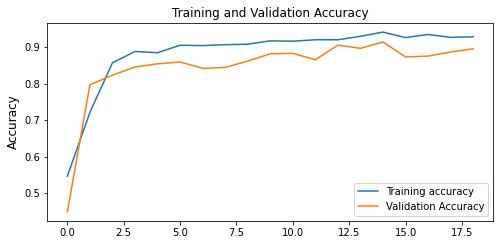

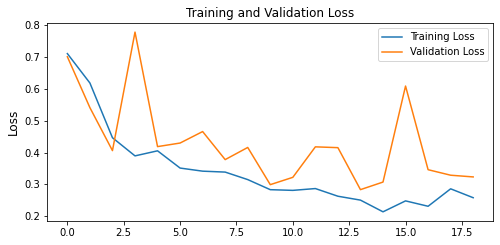

In [ ]:
acc = model.history.history["accuracy"]
loss = model.history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc,label="Training accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.show()

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend()
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss",fontsize=12)
plt.show()

### Evaluation

In [ ]:
import pandas as pd

losses = pd.DataFrame(model.history.history)

In [ ]:
model.evaluate(validation_generator)

164/164 [==============================] - 6s 36ms/step - loss: 0.3067 - accuracy: 0.9076


[0.30672645568847656, 0.9075630307197571]

In [ ]:
pred_probabilities = model.predict(validation_generator)
pred_probabilities

array([[9.26657021e-01],
       [1.06453067e-02],
       [9.54104960e-01],
       ...,
       [1.02119294e-07],
       [1.07174687e-08],
       [9.60208714e-01]], dtype=float32)

In [ ]:
import numpy as np

y_pred = np.argmax(pred_probabilities, axis=1)

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(validation_generator.classes, predictions))

              precision    recall  f1-score   support

           0       0.50      0.51      0.50      1308
           1       0.50      0.49      0.49      1310

    accuracy                           0.50      2618
   macro avg       0.50      0.50      0.50      2618
weighted avg       0.50      0.50      0.50      2618



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

c_m = pd.DataFrame(confusion_matrix(validation_generator.classes, predictions))
c_m

,0,1
0,667,641
1,673,637


In [ ]:
import pandas as pd

In [ ]:
clsr = confusion_matrix(validation_generator.classes, predictions)

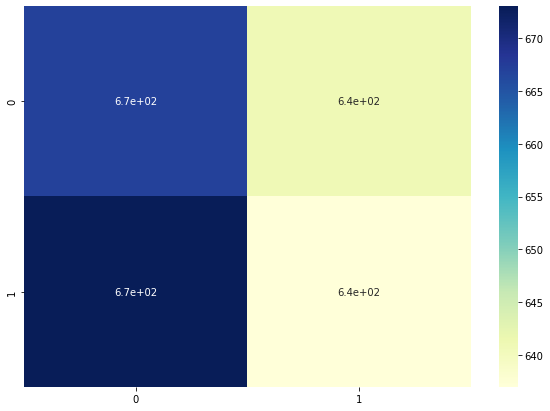

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(clsr, index = [i for i in "01"],  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")
plt.savefig('mat.png')

In [ ]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/Colab_Notebooks/Malaria Cell Detection/model_2.hdf5')

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/Malaria Cell Detection/NEW_NEW.hdf5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageOps
import numpy as np
import cv2


file_1=image.load_img('/content/drive/MyDrive/Colab_Notebooks/Malaria Cell Detection/C1_thinF_IMG_20150604_104722_cell_9.png',target_size=(150,150))

In [ ]:
a = Image.open(file_1)

AttributeError: ignored

In [ ]:
def import_and_predict(image_data, model):
    size = (150, 150)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    image = np.asarray(image)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.

    img_reshape = img[np.newaxis, ...]

    prediction = model.predict(img_reshape)

    return prediction

In [ ]:
file_1=image.load_img('/content/drive/MyDrive/Colab_Notebooks/Malaria Cell Detection/C1_thinF_IMG_20150604_104722_cell_9.png',target_size=(150,150))
prediction = import_and_predict(file_1,model)

if np.argmax(prediction) == 0:
  print("Alas! Your cell contains Malaria!")

else:
  print("Congratulations! The cell does not contain MALARIA")
      

Alas! Your cell contains Malaria!


In [ ]:
prediction

array([[1.8397276e-18]], dtype=float32)

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    # x = np.true_divide(x, 255)
    ## Scaling
    x=x/255
    x = np.expand_dims(x, axis=0)
   

    # Be careful how your trained model deals with the input
    # otherwise, it won't make correct prediction!
    x = preprocess_input(x)

    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    if preds==0:
        preds="The Person is Infected With Pneumonia"
    else:
        preds="The Person is not Infected With Pneumonia"
    
    
    return preds



In [ ]:
x_1.shape

In [ ]:
X=model.predict(x_2)

(150, 150, 3)

In [ ]:

X

array([[0.]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape


(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

ValueError: ignored

In [ ]:
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    preds = import_and_predict(image, model)
    prediction = np.argmax(preds, axis=1)

    if prediction == 0:
        st.write("Alas! Your cell contains Malaria!")
        st.image(image_3)

    elif prediction == 1:
        st.write("Congratulations! The cell does not contain MALARIA")
        st.image(image_2)
    else:
        st.write("Please upload new picture!")


AttributeError: ignored